# Using Machine Learning to Analyze Voice Disorders for Parkinson's Disease Detection
 The purpose of this project is to develop a machine learning model that can accurately predict the presence of Parkinson's disease in an individual  based on their voice recordings. Parkinson's disease is a neurodegenerative disorder that affects movement, with symptoms that include tremors, stiffness, and difficulty with coordination.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("parkinsons.data")
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


# Parkinson Data and Voice Disorder
Voice disorder dataset can be used to detect the presence of Parkinson's disease in an individual. While current tools have limitations in analyzing complex voice disorders, advancements in technology and research have enabled the development of new algorithms that can identify specific acoustic markers associated with Parkinson's disease in voice recordings. Therefore, the analysis of voice disorders can provide valuable information in diagnosing and monitoring Parkinson's disease.
This dataset is composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease (PD). My dataset includes voice attributes Information that can be used for detecting parkinson, these information including:
Matrix column entries (attributes):
name - ASCII subject name and recording number
MDVP:Fo(Hz) - Average vocal fundamental frequency
MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
MDVP:Flo(Hz) - Minimum vocal fundamental frequency
Five measures of variation in Frequency
MDVP:Jitter(%) - Percentage of cycle-to-cycle variability of the period duration
MDVP:Jitter(Abs) - Absolute value of cycle-to-cycle variability of the period duration
MDVP:RAP - Relative measure of the pitch disturbance
MDVP:PPQ - Pitch perturbation quotient
Jitter:DDP - Average absolute difference of differences between jitter cycles
Six measures of variation in amplitude
MDVP:Shimmer - Variations in the voice amplitdue
MDVP:Shimmer(dB) - Variations in the voice amplitdue in dB
Shimmer:APQ3 - Three point amplitude perturbation quotient measured against the average of the three amplitude
Shimmer:APQ5 - Five point amplitude perturbation quotient measured against the average of the three amplitude
MDVP:APQ - Amplitude perturbation quotient from MDVP
Shimmer:DDA - Average absolute difference between the amplitudes of consecutive periods
Two measures of ratio of noise to tonal components in the voice
NHR - Noise-to-harmonics Ratio and
HNR - Harmonics-to-noise Ratio
status - Health status of the subject (one) - Parkinson's, (zero) - healthy
Two nonlinear dynamical complexity measures
RPDE - Recurrence period density entropy
D2 - correlation dimension
DFA - Signal fractal scaling exponent
Three nonlinear measures of fundamental frequency variation
spread1 - discrete probability distribution of occurrence of relative semitone variations
spread2 - Three nonlinear measures of fundamental frequency variation
PPE - Entropy of the discrete probability distribution of occurrence of relative semitone variations

In [3]:
df.shape

(195, 24)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [5]:
df.isnull().sum()/len(df)*100 

name                0.0
MDVP:Fo(Hz)         0.0
MDVP:Fhi(Hz)        0.0
MDVP:Flo(Hz)        0.0
MDVP:Jitter(%)      0.0
MDVP:Jitter(Abs)    0.0
MDVP:RAP            0.0
MDVP:PPQ            0.0
Jitter:DDP          0.0
MDVP:Shimmer        0.0
MDVP:Shimmer(dB)    0.0
Shimmer:APQ3        0.0
Shimmer:APQ5        0.0
MDVP:APQ            0.0
Shimmer:DDA         0.0
NHR                 0.0
HNR                 0.0
status              0.0
RPDE                0.0
DFA                 0.0
spread1             0.0
spread2             0.0
D2                  0.0
PPE                 0.0
dtype: float64

In [6]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


# Let's get the features we select all columns in the dataset except for the status column. This is done using the drop method, which returns a new DataFrame with the specified columns (in this case, 'status' , 'name') removed. The axis=1 argument indicates that we're dropping a column, not a row.

# The Health status of the subject (one) - Parkinson's, (zero) - healthy 

In [7]:
x = df.drop(['status','name'], axis=1)
print("Features shape:", x.shape)
y = df.status
print("Target shape: ", y.shape)

Features shape: (195, 22)
Target shape:  (195,)


In [8]:
x.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [9]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: status, dtype: int64

In [10]:
df['status'].value_counts()

status
1    147
0     48
Name: count, dtype: int64

<Axes: ylabel='count'>

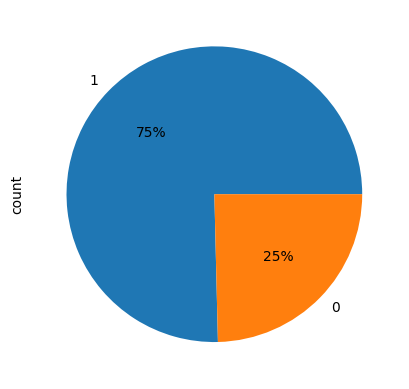

In [11]:
df['status'].value_counts().plot(kind='pie', autopct = "%1.0f%%")


# t-SNE (t-Distributed Stochastic Neighbor Embedding) is a machine learning technique used for dimensionality reduction and visualization of high-dimensional datasets. It is particularly useful for visualizing complex data structures, as it helps to project the data points from a high-dimensional space to a lower-dimensional space (usually 2D or 3D) while preserving the relationships between the data points as much as possible.

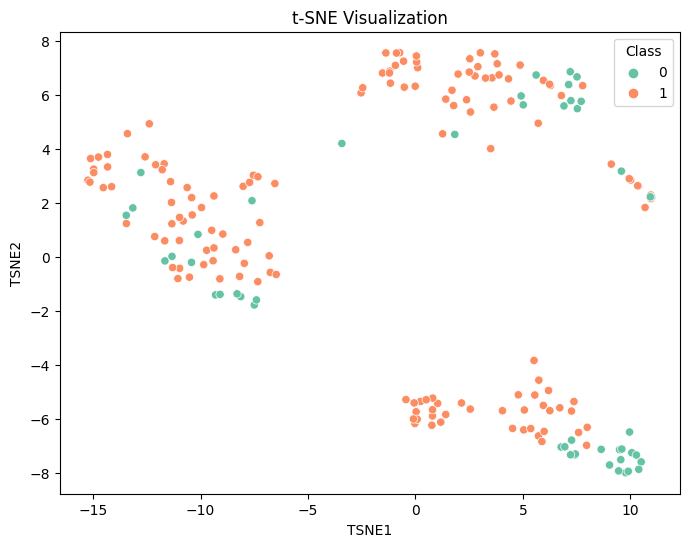

In [12]:
import seaborn as sns
from sklearn.manifold import TSNE

# Apply t-SNE to reduce the dimensions to 2
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(x)

# Create a DataFrame with the t-SNE-transformed data and class labels
tsne_df = pd.DataFrame(data=X_tsne, columns=['TSNE1', 'TSNE2'])
tsne_df['Class'] = y.values

# Visualize the data based on class using a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='Class', palette='Set2')
plt.title('t-SNE Visualization')
plt.show()

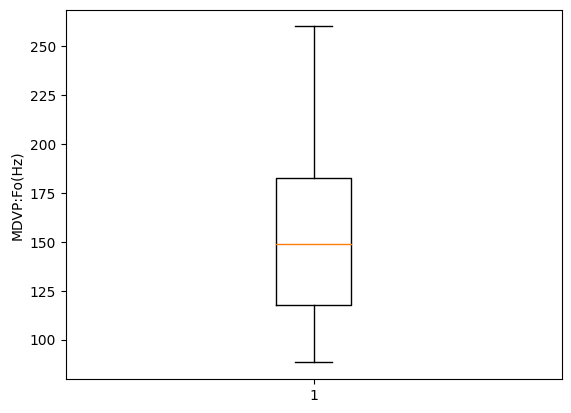

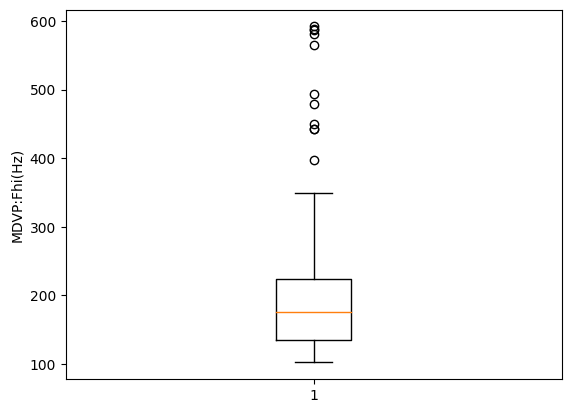

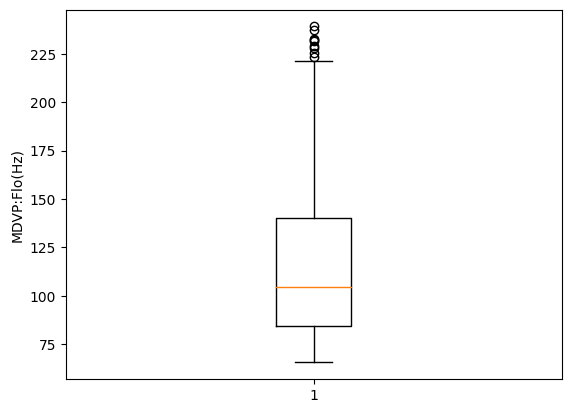

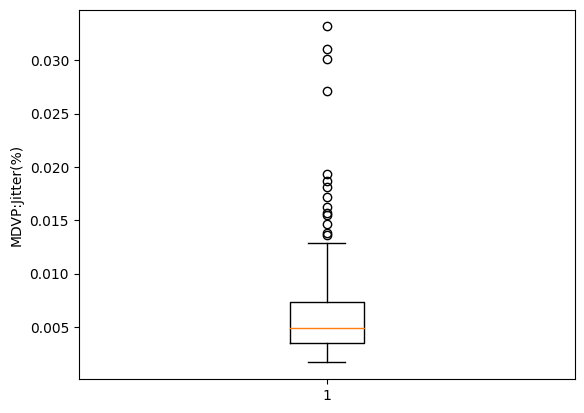

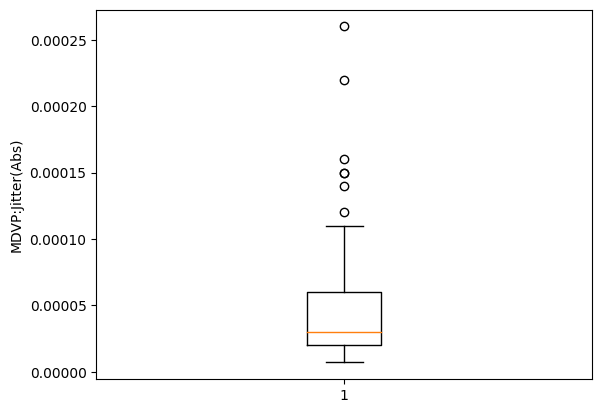

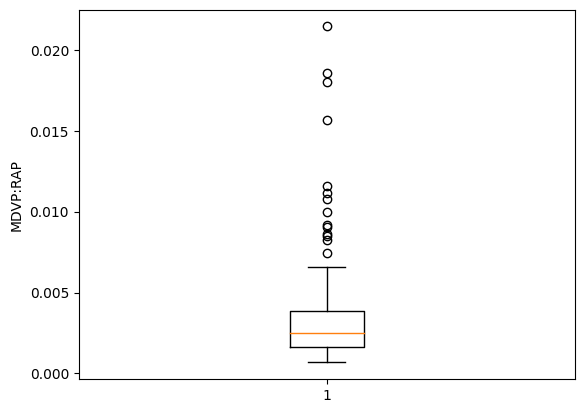

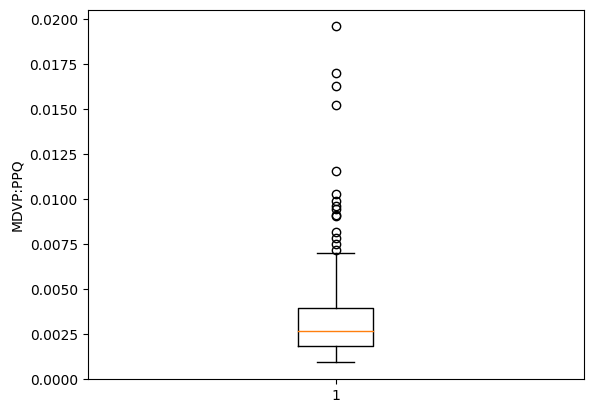

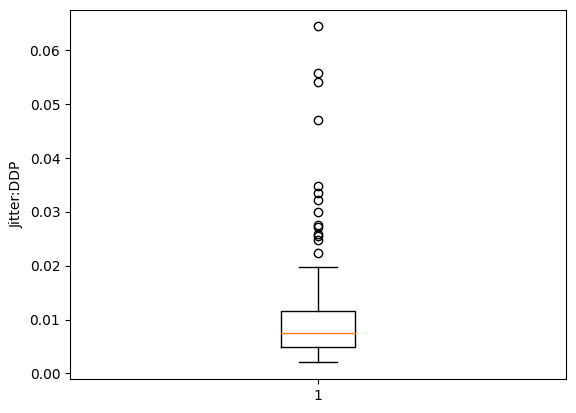

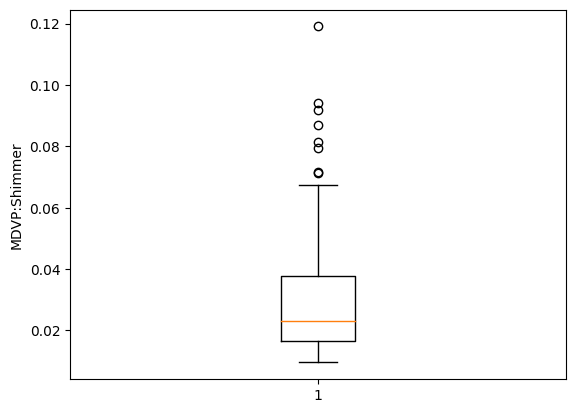

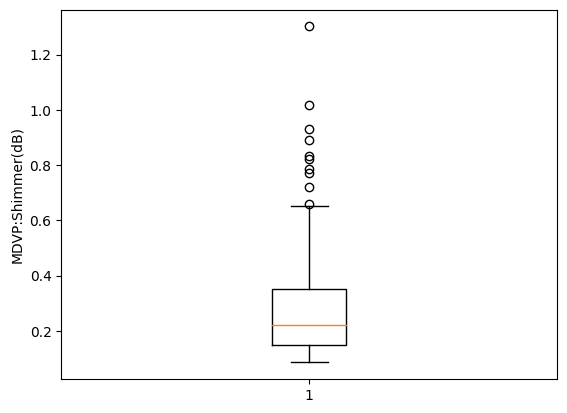

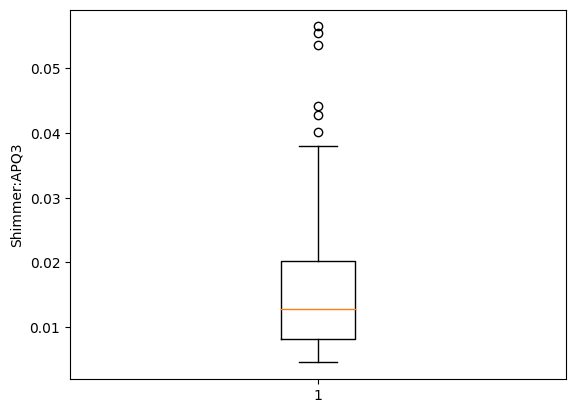

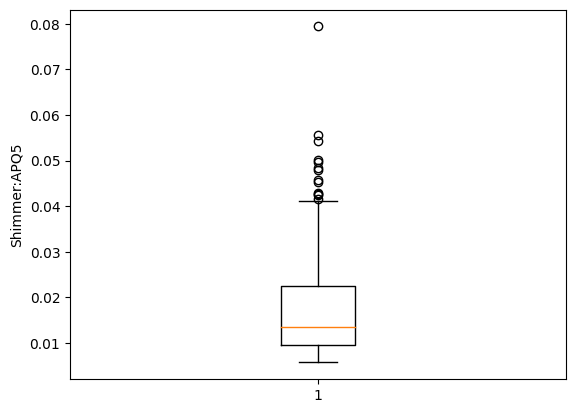

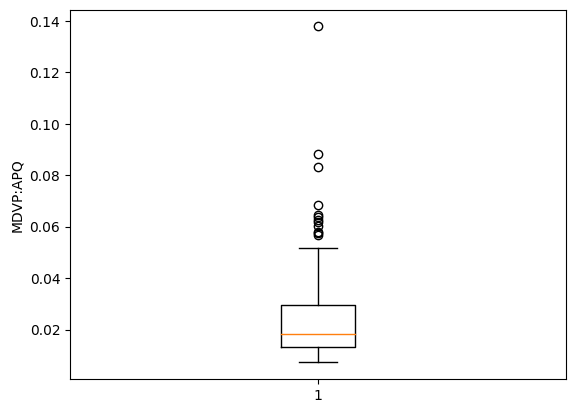

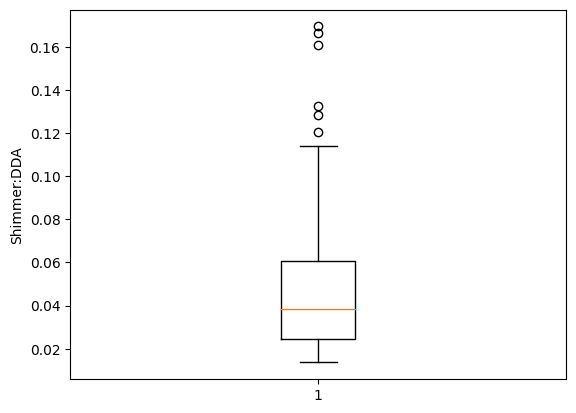

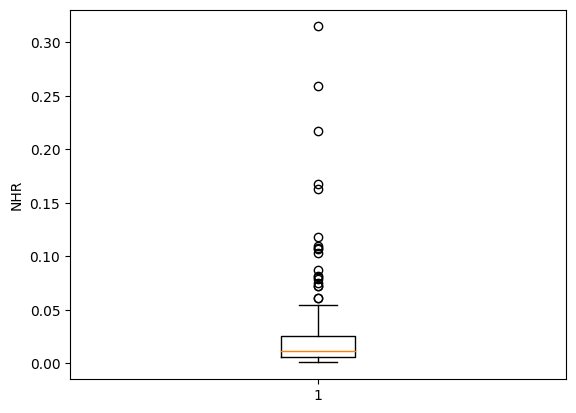

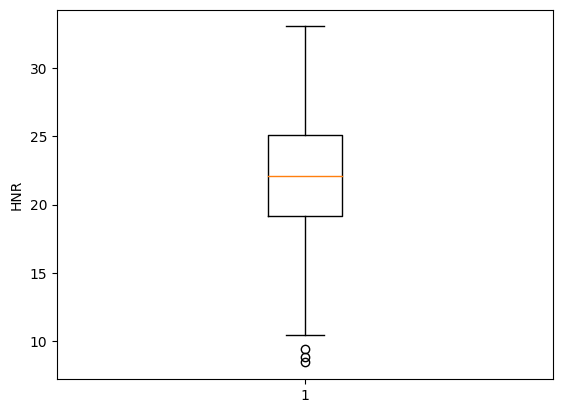

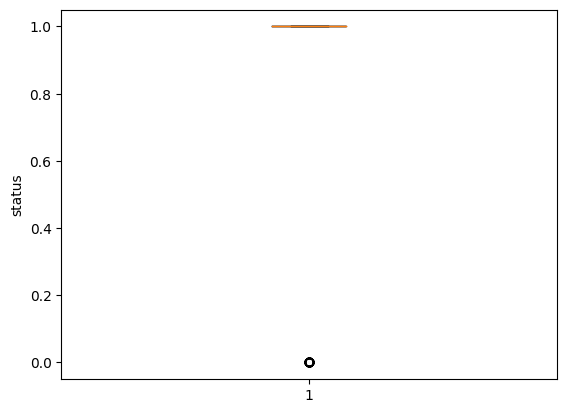

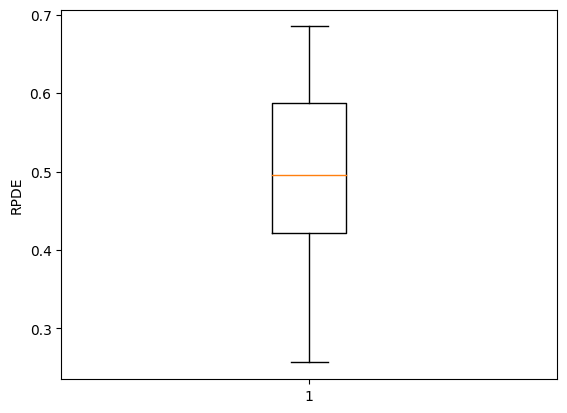

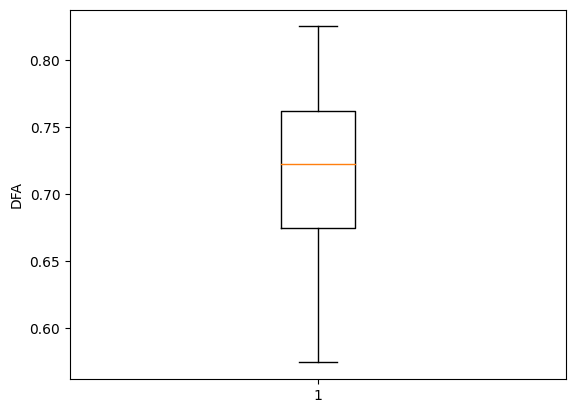

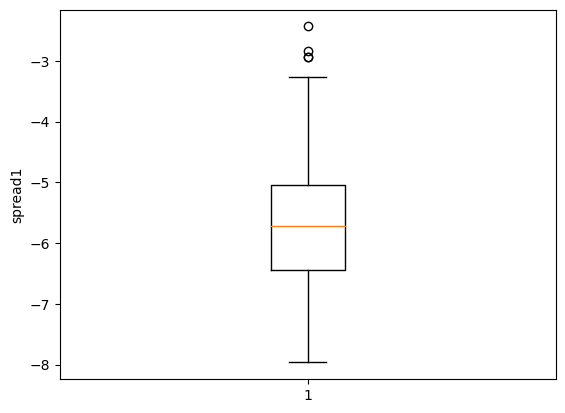

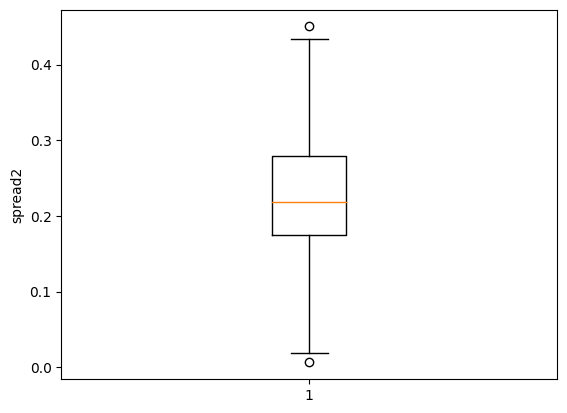

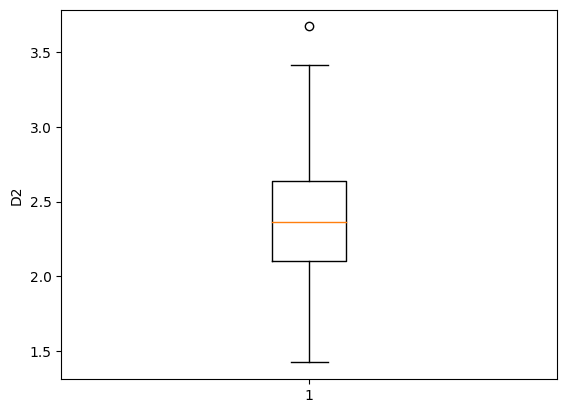

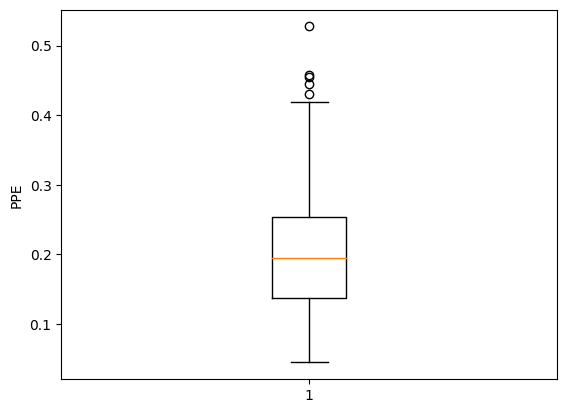

In [13]:
for i in df.columns[1:]:
    fig, ax = plt.subplots()
    ax.boxplot(df[i])
    plt.ylabel(i)

In [14]:
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [15]:
i = df[(df["MDVP:Fhi(Hz)"] > 300)].index
df.drop(i, axis = 0, inplace = True)

In [16]:
i = df[(df["MDVP:Flo(Hz)"] > 180)].index
df.drop(i, axis = 0, inplace = True)

In [17]:
i = df[(df["MDVP:Jitter(%)"] > 0.010)].index
df.drop(i, axis = 0, inplace = True)

In [18]:
i = df[(df["MDVP:Jitter(Abs)"] > 0.00008)].index
df.drop(i, axis = 0, inplace = True)

In [19]:
i = df[(df["MDVP:RAP"] > 0.005)].index
df.drop(i, axis = 0, inplace = True)

In [20]:
i = df[(df["MDVP:PPQ"] > 0.0050)].index
df.drop(i, axis = 0, inplace = True)

In [21]:
i = df[(df["Jitter:DDP"] > 0.0050)].index
df.drop(i, axis = 0, inplace = True)

In [22]:
i = df[(df["MDVP:Shimmer"] > 0.5)].index
df.drop(i, axis = 0, inplace = True)

In [23]:
i = df[(df["MDVP:Shimmer(dB)"] > 0.5)].index
df.drop(i, axis = 0, inplace = True)

In [24]:
i = df[(df["Shimmer:APQ3"] > 0.030)].index
df.drop(i, axis = 0, inplace = True)

In [25]:
i = df[(df["Shimmer:APQ5"] > 0.050)].index
df.drop(i, axis = 0, inplace = True)

In [26]:
i = df[(df["MDVP:APQ"] > 0.04)].index
df.drop(i, axis = 0, inplace = True)

In [27]:
i = df[(df["Shimmer:DDA"] > 0.08)].index
df.drop(i, axis = 0, inplace = True)

In [28]:
i = df[(df["NHR"] > 0.0050)].index
df.drop(i, axis = 0, inplace = True)

In [29]:
i = df[(df["HNR"] > 0.04)].index
df.drop(i, axis = 0, inplace = True)

In [30]:
i = df[(df["spread1"] > -4)].index
df.drop(i, axis = 0, inplace = True)

In [31]:
i = df[(df["spread2"] > 0.4)].index
df.drop(i, axis = 0, inplace = True)

In [32]:
i = df[(df["D2"] > 3.0)].index
df.drop(i, axis = 0, inplace = True)

In [33]:
i = df[(df["PPE"] > 0.35)].index
df.drop(i, axis = 0, inplace = True)

In [37]:
from scipy.stats import skew
col = x.select_dtypes(['int64' , 'float64']).columns

MDVP:Fo(Hz)
0.5871758758264713


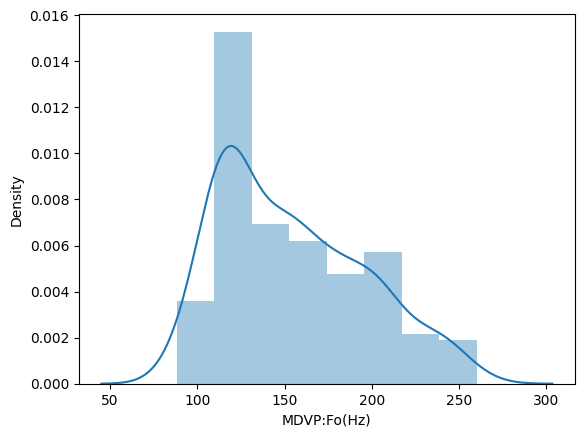

MDVP:Fhi(Hz)
2.5225490936388146


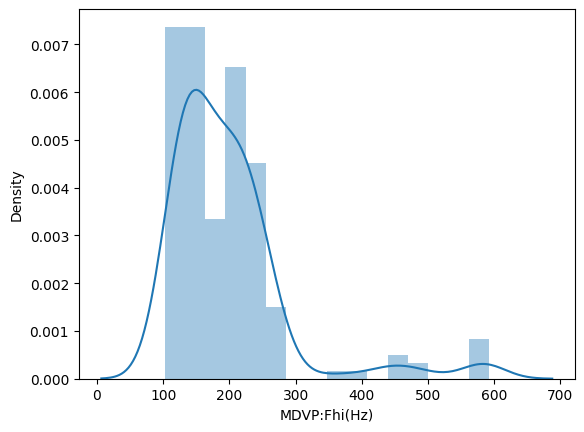

MDVP:Flo(Hz)
1.2079661332354688


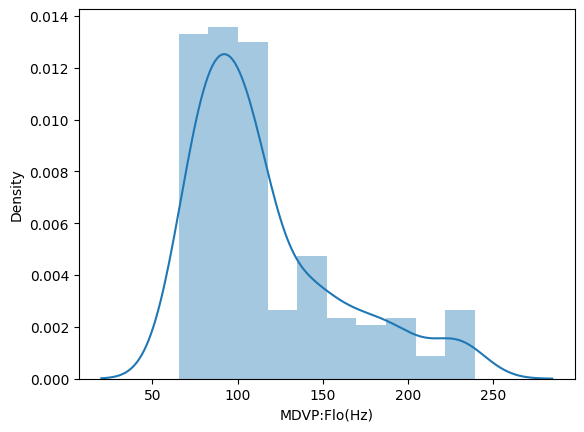

MDVP:Jitter(%)
3.061164957386332


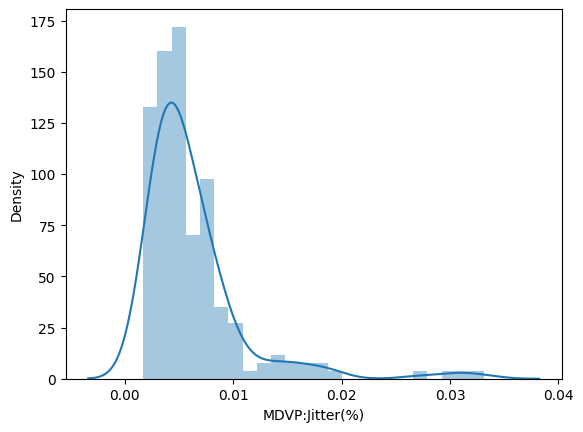

MDVP:Jitter(Abs)
2.6286502455329948


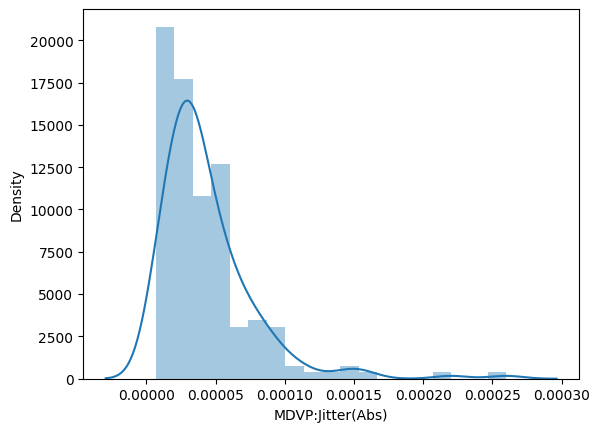

MDVP:RAP
3.334801409433699


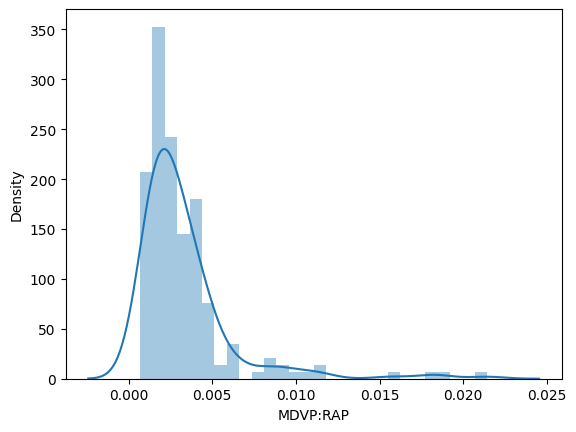

MDVP:PPQ
3.050196424967615


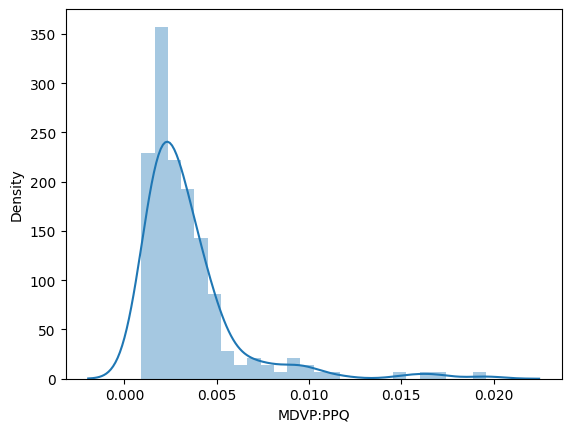

Jitter:DDP
3.3361409999741496


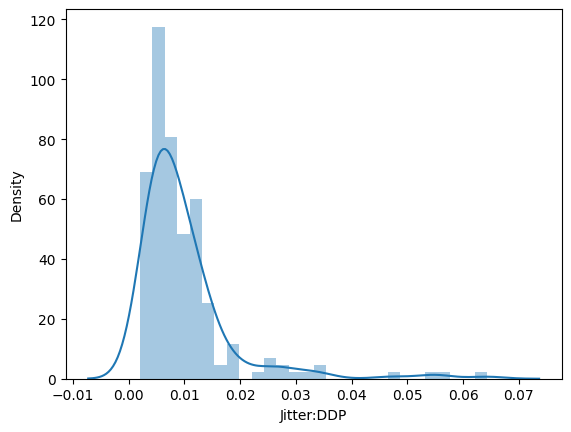

MDVP:Shimmer
1.6536338401467416


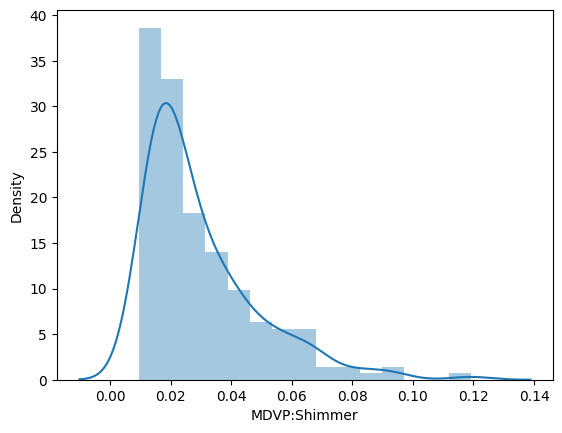

MDVP:Shimmer(dB)
1.983975744958398


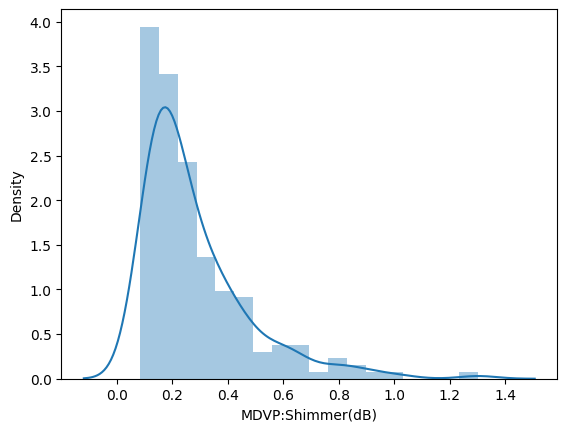

Shimmer:APQ3
1.5683920271611078


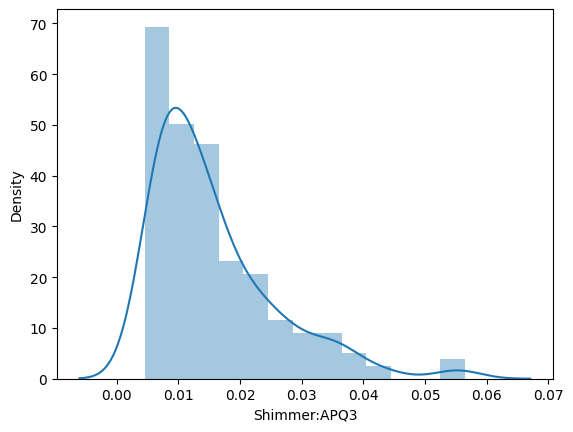

Shimmer:APQ5
1.7848312643056599


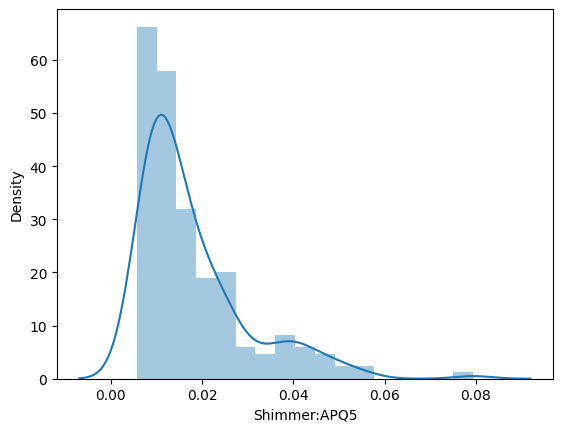

MDVP:APQ
2.5978644961905406


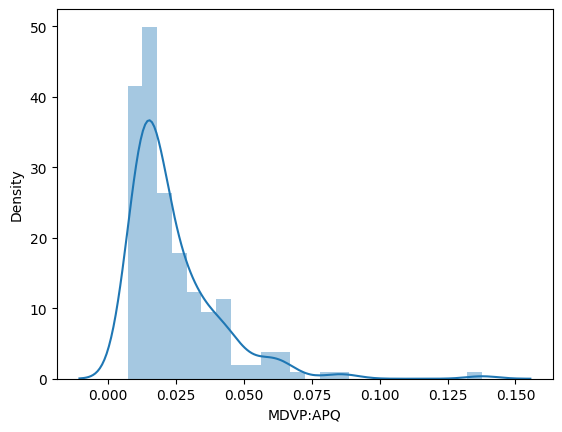

Shimmer:DDA
1.5684333201651852


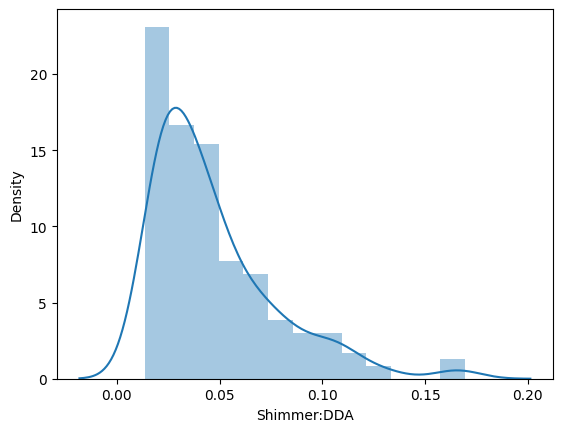

NHR
4.188172511855344


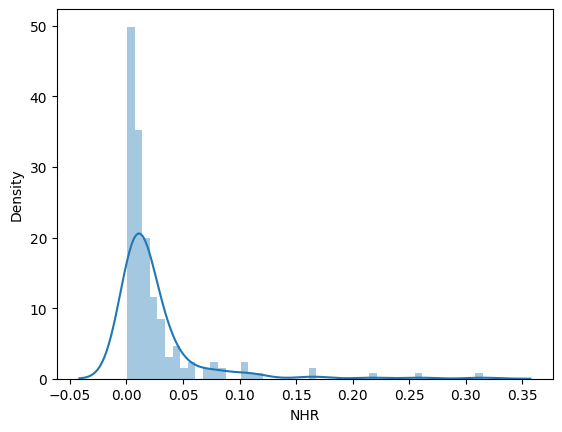

HNR
-0.510352725042725


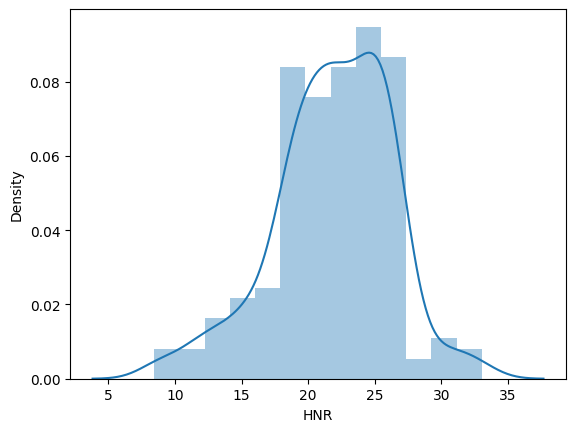

RPDE
-0.14229695276961832


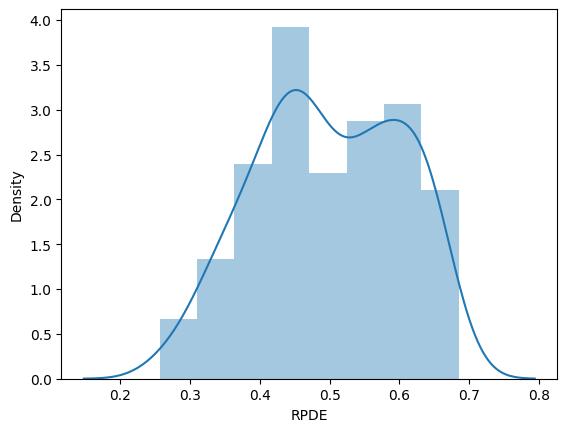

DFA
-0.032957623130060634


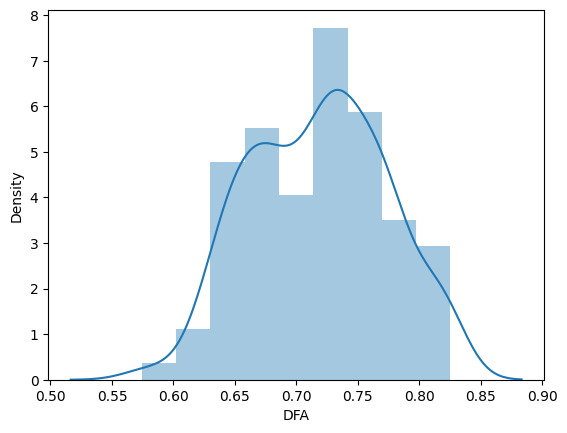

spread1
0.4288076579039929


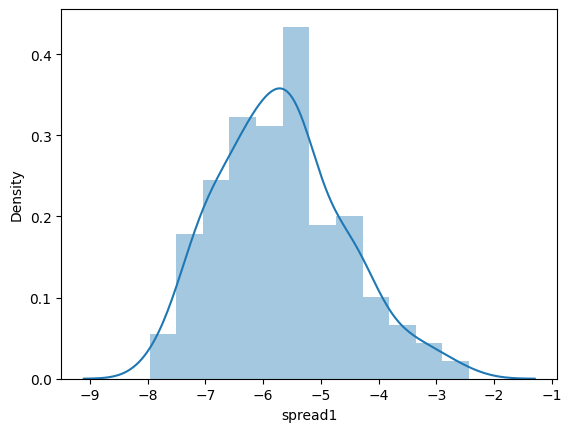

spread2
0.14331709926151373


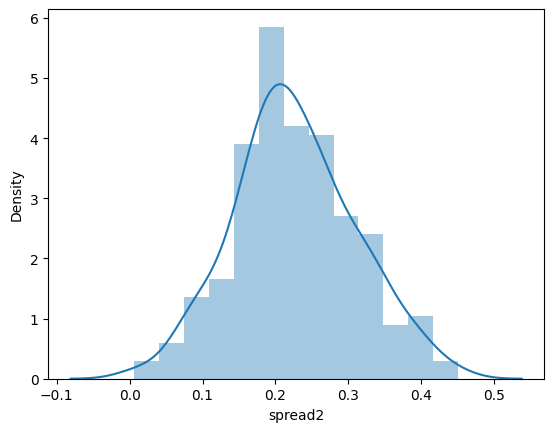

D2
0.42706614648747077


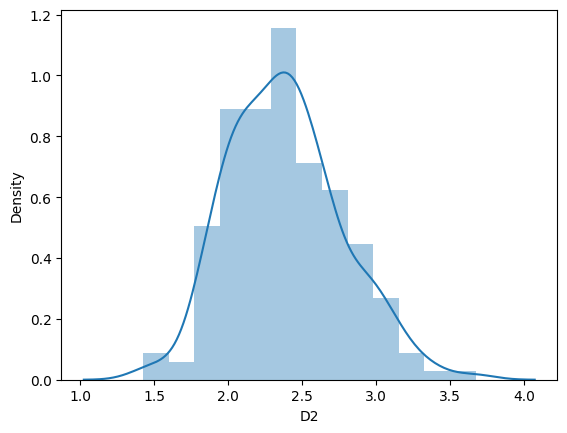

PPE
0.7913433696864662


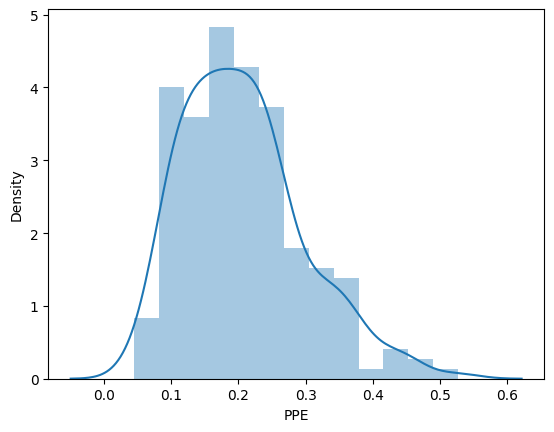

In [38]:
for i in x[col]:
    print(i)
    print(skew(x[i]))

    plt.figure()
    sns.distplot(x[i])
    plt.show()

In [39]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  HNR               195 non-null    float64
 16  RPDE              195 non-null    float64
 1

In [40]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 195 entries, 0 to 194
Series name: status
Non-Null Count  Dtype
--------------  -----
195 non-null    int64
dtypes: int64(1)
memory usage: 1.7 KB


In [41]:
scaler = MinMaxScaler((-1, 1))

# fits the data normally 
X = scaler.fit_transform(x)

In [42]:
X

array([[-0.63138346, -0.77481654, -0.89037042, ...,  0.17153026,
        -0.21867743, -0.0053808 ],
       [-0.6033463 , -0.81013911, -0.4433544 , ...,  0.48267409,
        -0.05370956,  0.34265204],
       [-0.66992292, -0.88174367, -0.46942324, ...,  0.37274182,
        -0.18236124,  0.19336492],
       ...,
       [ 0.00546073, -0.43717403, -0.89854572, ..., -0.31484696,
         0.11793486, -0.63884033],
       [ 0.28578581,  0.20361309, -0.89144127, ..., -0.09423055,
        -0.36355605, -0.67372646],
       [ 0.46654868, -0.35441175, -0.85610326, ..., -0.16981039,
         0.00734563, -0.5690805 ]])

# Data preparation
Here,Ieame splitting a dataset into independent and dependent variables, and then splitting it further into training and testing sets.

In [43]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest=train_test_split(X, y, test_size=0.2 , random_state = 1) 

In [44]:
from imblearn.over_sampling import RandomOverSampler

In [45]:
# Define the oversampler
oversampler = RandomOverSampler(sampling_strategy='minority', random_state=42)

# Fit and transform the training data
x_train_resampled, y_train_resampled = oversampler.fit_resample(xtrain, ytrain)


In [90]:
x_train_resampled

array([[-0.52258808, -0.84599651, -0.38825751, ...,  0.18676599,
        -0.28783007, -0.57354586],
       [-0.24886477, -0.75030875, -0.88070975, ..., -0.11134373,
        -0.37511366, -0.47989346],
       [ 0.49946441, -0.46380885, -0.67181365, ...,  0.72446924,
         0.336889  , -0.27047313],
       ...,
       [ 0.28578581,  0.20361309, -0.89144127, ..., -0.09423055,
        -0.36355605, -0.67372646],
       [ 0.7347414 , -0.42205211,  0.88584522, ..., -0.23442266,
        -0.61820267, -0.80504445],
       [-0.60581468, -0.89195015, -0.42094718, ...,  0.17112505,
        -0.41577085, -0.62998003]])

In [91]:
y_train_resampled

0      0
1      1
2      1
3      1
4      0
      ..
231    0
232    0
233    0
234    0
235    0
Name: status, Length: 236, dtype: int64

# LogisticRegression

In [48]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train_resampled, y_train_resampled)
ypred = logreg.predict(xtest)


In [49]:
from sklearn.metrics import accuracy_score,classification_report
ac = accuracy_score(ytest,ypred)
cr = classification_report(ytest,ypred)
print("Accuracy score : ",ac)
print(cr)

Accuracy score :  0.717948717948718
              precision    recall  f1-score   support

           0       0.47      0.80      0.59        10
           1       0.91      0.69      0.78        29

    accuracy                           0.72        39
   macro avg       0.69      0.74      0.69        39
weighted avg       0.80      0.72      0.74        39



# LogisticRegression Using HPT - liblinear

In [50]:
logreg = LogisticRegression(solver = "liblinear")
logreg.fit(x_train_resampled, y_train_resampled)
ypred = logreg.predict(xtest)


In [51]:
ac = accuracy_score(ytest,ypred)
cr = classification_report(ytest,ypred)
print("Accuracy score : ",ac)
print(cr)

Accuracy score :  0.717948717948718
              precision    recall  f1-score   support

           0       0.47      0.80      0.59        10
           1       0.91      0.69      0.78        29

    accuracy                           0.72        39
   macro avg       0.69      0.74      0.69        39
weighted avg       0.80      0.72      0.74        39



# LogisticRegression Using HPT - newton-cg

In [52]:
logreg = LogisticRegression(solver = 'newton-cg')
logreg.fit(x_train_resampled, y_train_resampled)
ypred = logreg.predict(xtest)

In [53]:
ac = accuracy_score(ytest,ypred)
cr = classification_report(ytest,ypred)
print("Accuracy score : ",ac)
print(cr)


Accuracy score :  0.717948717948718
              precision    recall  f1-score   support

           0       0.47      0.80      0.59        10
           1       0.91      0.69      0.78        29

    accuracy                           0.72        39
   macro avg       0.69      0.74      0.69        39
weighted avg       0.80      0.72      0.74        39



# LogisticRegression Using HPT - saga

In [54]:
logreg = LogisticRegression(solver = 'saga')
logreg.fit(x_train_resampled, y_train_resampled)
ypred = logreg.predict(xtest)

In [55]:
ac = accuracy_score(ytest,ypred)
cr = classification_report(ytest,ypred)
print("Accuracy score : ",ac)
print(cr)

Accuracy score :  0.717948717948718
              precision    recall  f1-score   support

           0       0.47      0.80      0.59        10
           1       0.91      0.69      0.78        29

    accuracy                           0.72        39
   macro avg       0.69      0.74      0.69        39
weighted avg       0.80      0.72      0.74        39



# DecisionTreeClassifier

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


In [57]:
dt = DecisionTreeClassifier()


In [58]:
def mymodel(model):
 model.fit(x_train_resampled, y_train_resampled)
 ypred = model.predict(xtest)
 print(accuracy_score(ytest,ypred))
 print(classification_report(ytest,ypred))
 
 return model

In [59]:
mymodel(dt)

0.8205128205128205
              precision    recall  f1-score   support

           0       0.67      0.60      0.63        10
           1       0.87      0.90      0.88        29

    accuracy                           0.82        39
   macro avg       0.77      0.75      0.76        39
weighted avg       0.82      0.82      0.82        39



DecisionTreeClassifier()

In [60]:
train = dt.score(x_train_resampled, y_train_resampled)
test = dt.score(xtest,ytest)
print(f"train score :{train} \n test score : {test}")


train score :1.0 
 test score : 0.8205128205128205


In [61]:
for i in range(20,30):
 dt1 = DecisionTreeClassifier(max_depth = i)
 dt1.fit(x_train_resampled, y_train_resampled)
 ypred = dt1.predict(xtest)
 ac = accuracy_score(ytest,ypred)
 print(f"max_depth = {i} accuracy : {ac}")

max_depth = 20 accuracy : 0.8461538461538461
max_depth = 21 accuracy : 0.8461538461538461
max_depth = 22 accuracy : 0.7948717948717948
max_depth = 23 accuracy : 0.8461538461538461
max_depth = 24 accuracy : 0.8205128205128205
max_depth = 25 accuracy : 0.8205128205128205
max_depth = 26 accuracy : 0.7948717948717948
max_depth = 27 accuracy : 0.8205128205128205
max_depth = 28 accuracy : 0.8461538461538461
max_depth = 29 accuracy : 0.7948717948717948


In [62]:
dt2 = DecisionTreeClassifier(max_depth = 21)
mymodel(dt2)

0.8461538461538461
              precision    recall  f1-score   support

           0       0.75      0.60      0.67        10
           1       0.87      0.93      0.90        29

    accuracy                           0.85        39
   macro avg       0.81      0.77      0.78        39
weighted avg       0.84      0.85      0.84        39



DecisionTreeClassifier(max_depth=21)

In [63]:
train = dt2.score(x_train_resampled, y_train_resampled)
test = dt2.score(xtest,ytest)
print(f"train score :{train} \n test score : {test}")

train score :1.0 
 test score : 0.8461538461538461


In [64]:
for i in range(2,30):
 dt3 = DecisionTreeClassifier(min_samples_split = i)
 dt3.fit(x_train_resampled, y_train_resampled)
 ypred = dt3.predict(xtest)
 ac = accuracy_score(ytest,ypred)
 print(f"max_depth = {i} accuracy : {ac}")

max_depth = 2 accuracy : 0.8205128205128205
max_depth = 3 accuracy : 0.8717948717948718
max_depth = 4 accuracy : 0.8205128205128205
max_depth = 5 accuracy : 0.8205128205128205
max_depth = 6 accuracy : 0.7948717948717948
max_depth = 7 accuracy : 0.8205128205128205
max_depth = 8 accuracy : 0.8461538461538461
max_depth = 9 accuracy : 0.8205128205128205
max_depth = 10 accuracy : 0.8205128205128205
max_depth = 11 accuracy : 0.7435897435897436
max_depth = 12 accuracy : 0.7692307692307693
max_depth = 13 accuracy : 0.7692307692307693
max_depth = 14 accuracy : 0.7692307692307693
max_depth = 15 accuracy : 0.7692307692307693
max_depth = 16 accuracy : 0.7948717948717948
max_depth = 17 accuracy : 0.7692307692307693
max_depth = 18 accuracy : 0.7692307692307693
max_depth = 19 accuracy : 0.7692307692307693
max_depth = 20 accuracy : 0.7692307692307693
max_depth = 21 accuracy : 0.7435897435897436
max_depth = 22 accuracy : 0.7692307692307693
max_depth = 23 accuracy : 0.7692307692307693
max_depth = 24 acc

In [65]:
dt4 = DecisionTreeClassifier(min_samples_split = 3)
mymodel(dt4)

0.8461538461538461
              precision    recall  f1-score   support

           0       0.70      0.70      0.70        10
           1       0.90      0.90      0.90        29

    accuracy                           0.85        39
   macro avg       0.80      0.80      0.80        39
weighted avg       0.85      0.85      0.85        39



DecisionTreeClassifier(min_samples_split=3)

In [66]:
train = dt4.score(x_train_resampled, y_train_resampled)
test = dt4.score(xtest,ytest)
print(f"train score :{train} \n test score : {test}")

train score :1.0 
 test score : 0.8461538461538461


In [67]:
for i in range(2,30):
 dt5 = DecisionTreeClassifier(min_samples_leaf = i)
 dt5.fit(x_train_resampled, y_train_resampled)
 ypred = dt5.predict(xtest)
 ac = accuracy_score(ytest,ypred)
 print(f"max_depth = {i} accuracy : {ac}")

max_depth = 2 accuracy : 0.7692307692307693
max_depth = 3 accuracy : 0.7948717948717948
max_depth = 4 accuracy : 0.7948717948717948
max_depth = 5 accuracy : 0.7692307692307693
max_depth = 6 accuracy : 0.7435897435897436
max_depth = 7 accuracy : 0.7948717948717948
max_depth = 8 accuracy : 0.7948717948717948
max_depth = 9 accuracy : 0.7948717948717948
max_depth = 10 accuracy : 0.7948717948717948
max_depth = 11 accuracy : 0.7948717948717948
max_depth = 12 accuracy : 0.7948717948717948
max_depth = 13 accuracy : 0.7692307692307693
max_depth = 14 accuracy : 0.7948717948717948
max_depth = 15 accuracy : 0.7948717948717948
max_depth = 16 accuracy : 0.7435897435897436
max_depth = 17 accuracy : 0.8461538461538461
max_depth = 18 accuracy : 0.8461538461538461
max_depth = 19 accuracy : 0.8461538461538461
max_depth = 20 accuracy : 0.8461538461538461
max_depth = 21 accuracy : 0.8461538461538461
max_depth = 22 accuracy : 0.8461538461538461
max_depth = 23 accuracy : 0.8461538461538461
max_depth = 24 acc

In [68]:
dt6 = DecisionTreeClassifier(min_samples_leaf = 3)
mymodel(dt6)

0.7948717948717948
              precision    recall  f1-score   support

           0       0.58      0.70      0.64        10
           1       0.89      0.83      0.86        29

    accuracy                           0.79        39
   macro avg       0.74      0.76      0.75        39
weighted avg       0.81      0.79      0.80        39



DecisionTreeClassifier(min_samples_leaf=3)

In [69]:
train = dt6.score(x_train_resampled, y_train_resampled)
test = dt6.score(xtest,ytest)
print(f"train score :{train} \n test score : {test}")


train score :0.9788135593220338 
 test score : 0.7948717948717948


# RandomForestClassifier

In [70]:
from sklearn.ensemble import RandomForestClassifier
rc = RandomForestClassifier()
rc.fit(x_train_resampled, y_train_resampled)
ypred = rc.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.88      0.70      0.78        10
           1       0.90      0.97      0.93        29

    accuracy                           0.90        39
   macro avg       0.89      0.83      0.86        39
weighted avg       0.90      0.90      0.89        39



# AdaBoostClassifier

In [71]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(x_train_resampled, y_train_resampled)
ypred = ada.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.97      1.00      0.98        29

    accuracy                           0.97        39
   macro avg       0.98      0.95      0.97        39
weighted avg       0.98      0.97      0.97        39



# GradientBoostingClassifier

In [72]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train_resampled, y_train_resampled)
ypred = gbc.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.97      1.00      0.98        29

    accuracy                           0.97        39
   macro avg       0.98      0.95      0.97        39
weighted avg       0.98      0.97      0.97        39



# BaggingClassifier Using LogisticRegression & DecisionTreeClassifier

In [73]:
from sklearn.ensemble import BaggingClassifier
bg = BaggingClassifier(LogisticRegression())
bg.fit(x_train_resampled, y_train_resampled)
ypred = bg.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.47      0.80      0.59        10
           1       0.91      0.69      0.78        29

    accuracy                           0.72        39
   macro avg       0.69      0.74      0.69        39
weighted avg       0.80      0.72      0.74        39



In [74]:
bg = BaggingClassifier(DecisionTreeClassifier())
bg.fit(x_train_resampled, y_train_resampled)
ypred = bg.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        10
           1       0.93      0.93      0.93        29

    accuracy                           0.90        39
   macro avg       0.87      0.87      0.87        39
weighted avg       0.90      0.90      0.90        39



In [75]:
models =[]
models.append(("lr",LogisticRegression()))
models.append(("dt",DecisionTreeClassifier()))


# VotingClassifier

In [76]:
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier(estimators = models) # estimators --> model name
vc.fit(x_train_resampled, y_train_resampled)
ypred = vc.predict(xtest)
print(classification_report(ytest,ypred))


              precision    recall  f1-score   support

           0       0.42      0.80      0.55        10
           1       0.90      0.62      0.73        29

    accuracy                           0.67        39
   macro avg       0.66      0.71      0.64        39
weighted avg       0.78      0.67      0.69        39



In [77]:
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier(estimators = models,voting='soft') # estimators --> model na
vc.fit(x_train_resampled, y_train_resampled)
ypred = vc.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.67      0.60      0.63        10
           1       0.87      0.90      0.88        29

    accuracy                           0.82        39
   macro avg       0.77      0.75      0.76        39
weighted avg       0.82      0.82      0.82        39



# SVC

In [78]:
from sklearn.svm import SVC

In [79]:
# Initialize Support Vector Classifier (SVC)
svc1 = SVC()

# Fit the model on the training data
svc1.fit(x_train_resampled, y_train_resampled)

# Make predictions on the testing data
ypred = svc1.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.60      0.90      0.72        10
           1       0.96      0.79      0.87        29

    accuracy                           0.82        39
   macro avg       0.78      0.85      0.79        39
weighted avg       0.87      0.82      0.83        39



In [80]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'C': [10],
              'kernel': ['rbf'],
              'gamma': [1],
              'degree': [2]}

# Initialize Support Vector Classifier (SVC)
svc = SVC()

# Initialize GridSearchCV
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model on the training data with hyperparameter tuning
grid_search.fit(x_train_resampled, y_train_resampled)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Make predictions on the testing data
ypred = grid_search.predict(xtest)

# Evaluate the model
print('Accuracy Score:', accuracy_score(ytest, ypred))
print('Confusion Matrix:\n', confusion_matrix(ytest, ypred))
print('Classification Report:\n', classification_report(ytest, ypred))


Best Hyperparameters: {'C': 10, 'degree': 2, 'gamma': 1, 'kernel': 'rbf'}
Accuracy Score: 0.9487179487179487
Confusion Matrix:
 [[ 8  2]
 [ 0 29]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.94      1.00      0.97        29

    accuracy                           0.95        39
   macro avg       0.97      0.90      0.93        39
weighted avg       0.95      0.95      0.95        39



# KNeighborsClassifier

In [81]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN model
knn1 = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors

# Fit the model on the training data
knn1.fit(x_train_resampled, y_train_resampled)

# Make predictions on the testing data
ypred = knn1.predict(xtest)

In [82]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.97      0.97      0.97        29

    accuracy                           0.95        39
   macro avg       0.93      0.93      0.93        39
weighted avg       0.95      0.95      0.95        39



In [83]:
# Define the hyperparameter grid for KNN
param_grid = {'n_neighbors': [3], 'weights': ['uniform'], 'p': [2]}

# Initialize KNN model
knn = KNeighborsClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model on the training data with hyperparameter tuning
grid_search.fit(x_train_resampled, y_train_resampled)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Make predictions on the testing data
y_pred = grid_search.predict(xtest)

# Evaluate the model
print('Accuracy Score:', accuracy_score(ytest, ypred))
print('Confusion Matrix:\n', confusion_matrix(ytest, ypred))
print('Classification Report:\n', classification_report(ytest, ypred))

Best Hyperparameters: {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
Accuracy Score: 0.9487179487179487
Confusion Matrix:
 [[ 9  1]
 [ 1 28]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.97      0.97      0.97        29

    accuracy                           0.95        39
   macro avg       0.93      0.93      0.93        39
weighted avg       0.95      0.95      0.95        39



# StackingClassifier

In [84]:
from sklearn.ensemble import StackingClassifier


In [85]:
# Define base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('svm', SVC(kernel='rbf', C=1.0, probability=True, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42))
]

# Define meta-model
meta_model = LogisticRegression()

# Initialize StackingClassifier
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# Fit the stacking model on the training data
stacking_model.fit(x_train_resampled, y_train_resampled)

# Make predictions on the testing data
ypred = stacking_model.predict(xtest)

# Evaluate the stacking model
print('Accuracy Score:', accuracy_score(ytest, ypred))
print('Classification Report:\n', classification_report(ytest, ypred))


Accuracy Score: 0.8974358974358975
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.60      0.75        10
           1       0.88      1.00      0.94        29

    accuracy                           0.90        39
   macro avg       0.94      0.80      0.84        39
weighted avg       0.91      0.90      0.89        39



In [86]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
results = {}

def metric_printer(classifier):
    ypred = classifier.predict(xtest)
    classifier_name = classifier.__class__.__name__
    print("Classifier: ", classifier_name)
    accuracy = accuracy_score(ytest, ypred)
    print("Accuracy: ", accuracy)
    precision = precision_score(ytest, ypred)
    print("Precision: ", precision)
    recall = recall_score(ytest, ypred)
    print("Recall: ", recall)
    f1 = f1_score(ytest, ypred)
    print("F1 Score: ", f1)
    print('____________________________________')

    results[classifier_name] = {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1}

In [87]:
metric_printer(logreg)
metric_printer(dt6)
metric_printer(rc)
metric_printer(ada)
metric_printer(gbc)
metric_printer(bg)
metric_printer(vc)
metric_printer(svc1)
metric_printer(knn1)
metric_printer(stacking_model)

Classifier:  LogisticRegression
Accuracy:  0.717948717948718
Precision:  0.9090909090909091
Recall:  0.6896551724137931
F1 Score:  0.7843137254901961
____________________________________
Classifier:  DecisionTreeClassifier
Accuracy:  0.7948717948717948
Precision:  0.8888888888888888
Recall:  0.8275862068965517
F1 Score:  0.8571428571428572
____________________________________
Classifier:  RandomForestClassifier
Accuracy:  0.8974358974358975
Precision:  0.9032258064516129
Recall:  0.9655172413793104
F1 Score:  0.9333333333333333
____________________________________
Classifier:  AdaBoostClassifier
Accuracy:  0.9743589743589743
Precision:  0.9666666666666667
Recall:  1.0
F1 Score:  0.983050847457627
____________________________________
Classifier:  GradientBoostingClassifier
Accuracy:  0.9743589743589743
Precision:  0.9666666666666667
Recall:  1.0
F1 Score:  0.983050847457627
____________________________________
Classifier:  BaggingClassifier
Accuracy:  0.8974358974358975
Precision:  0.93

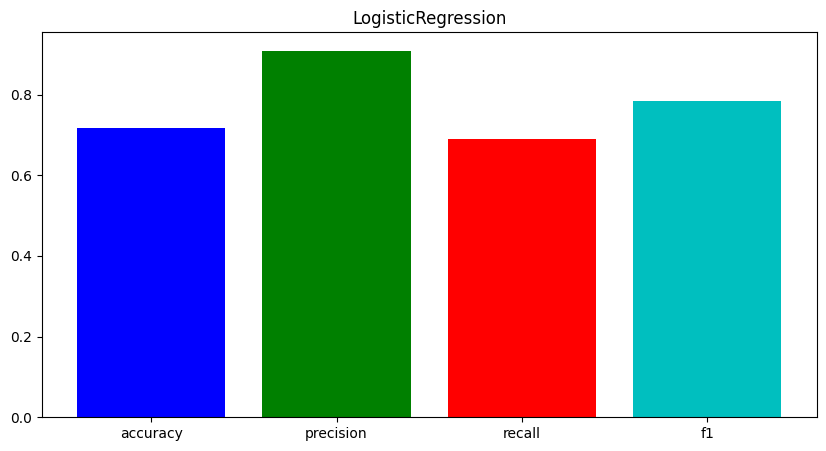

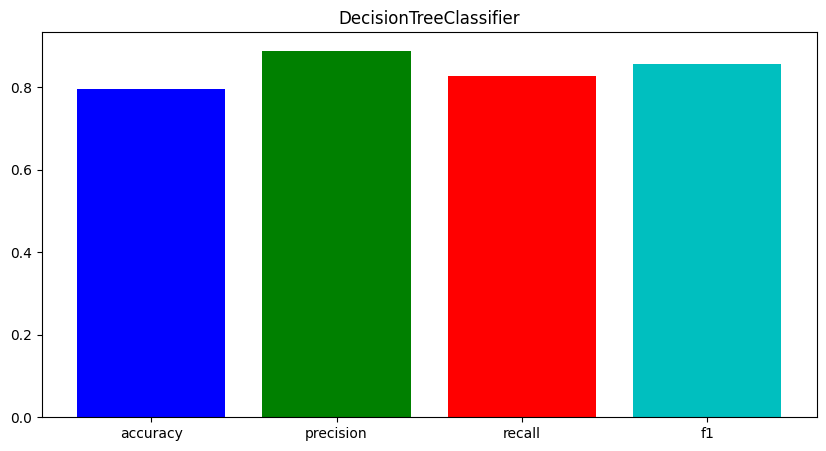

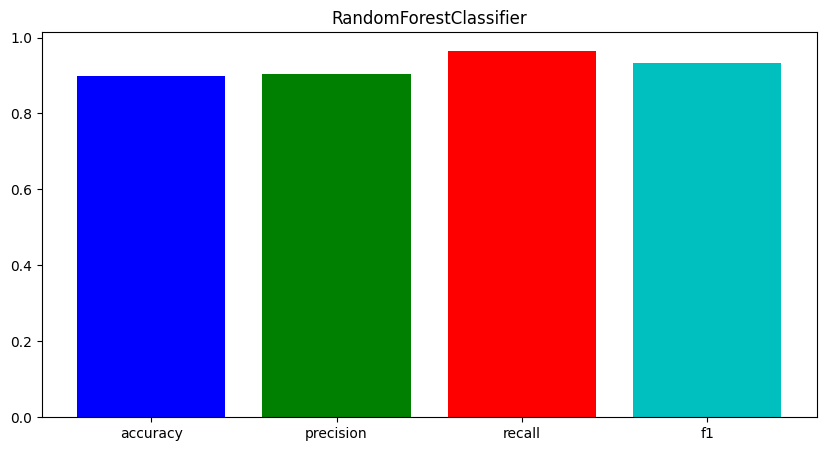

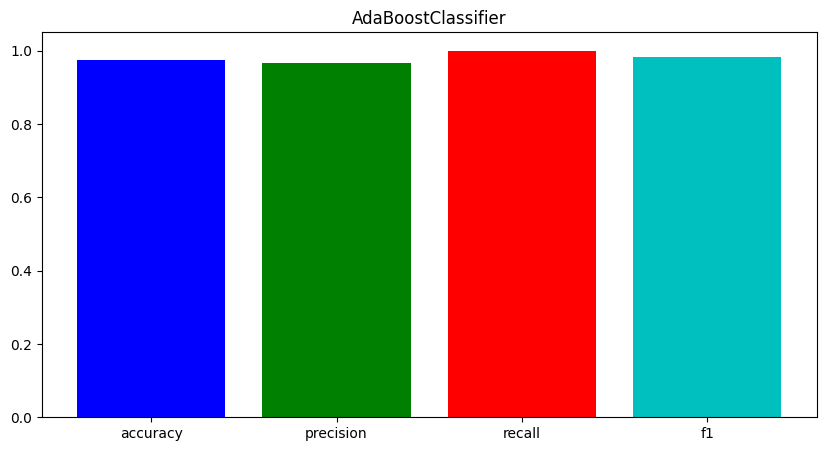

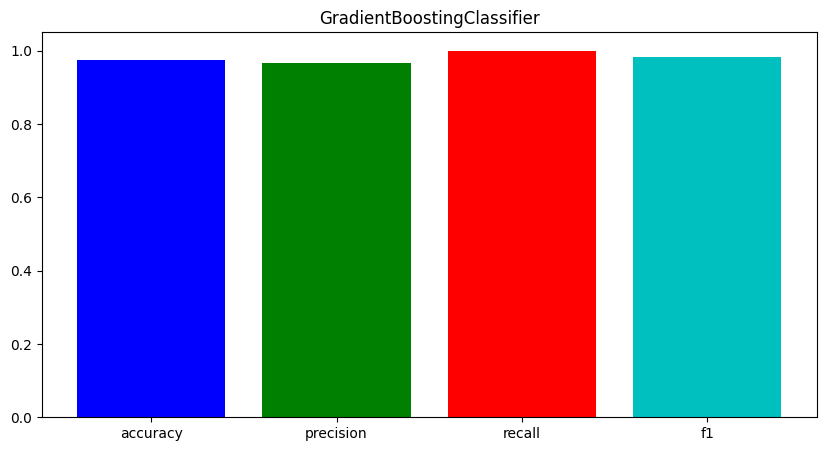

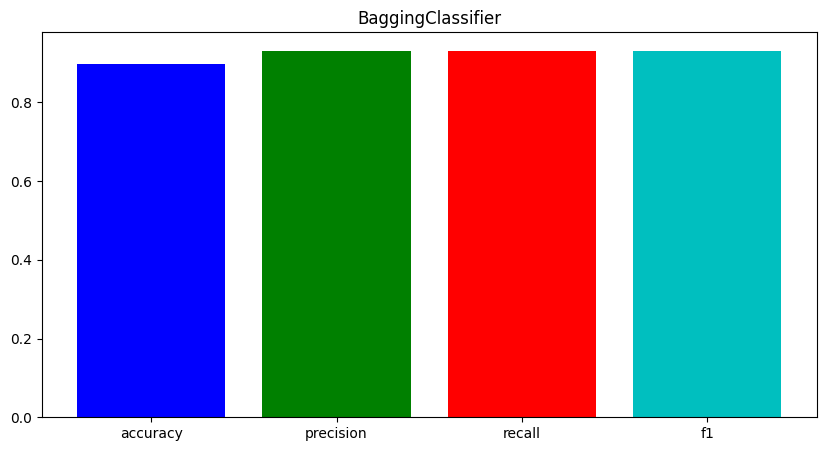

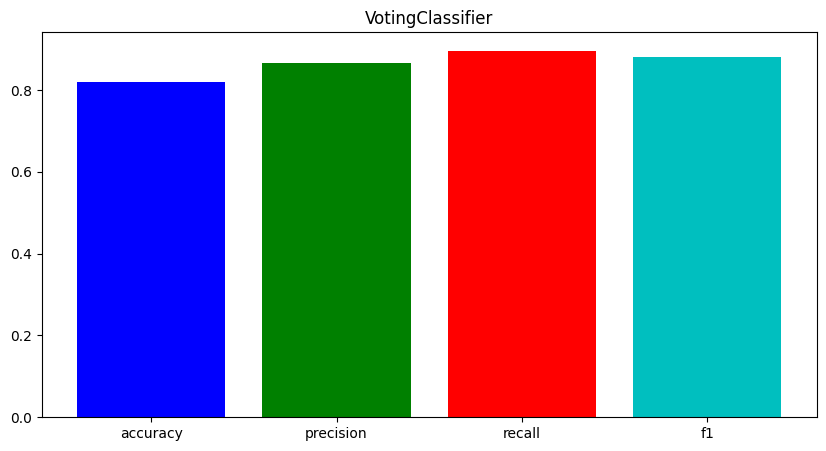

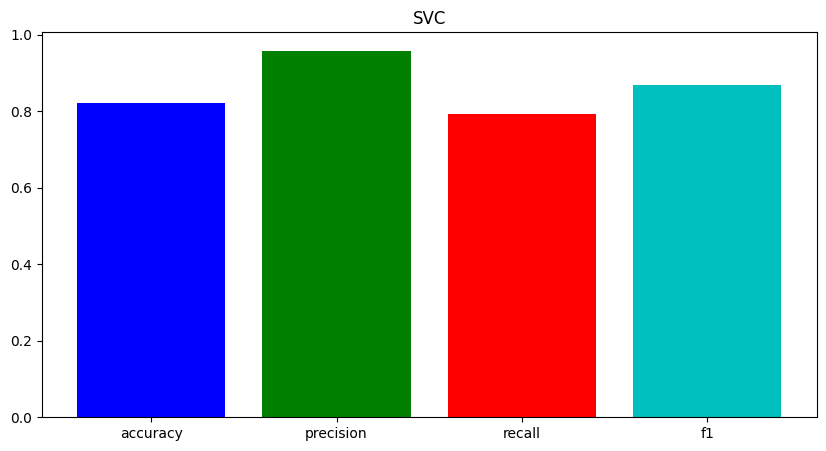

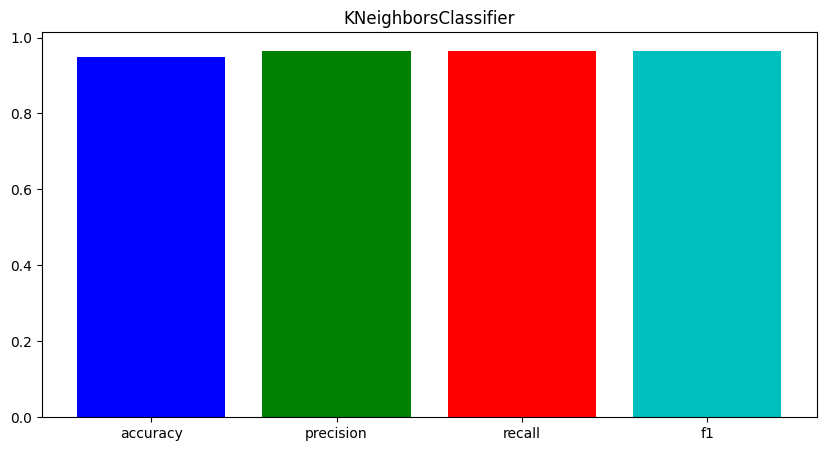

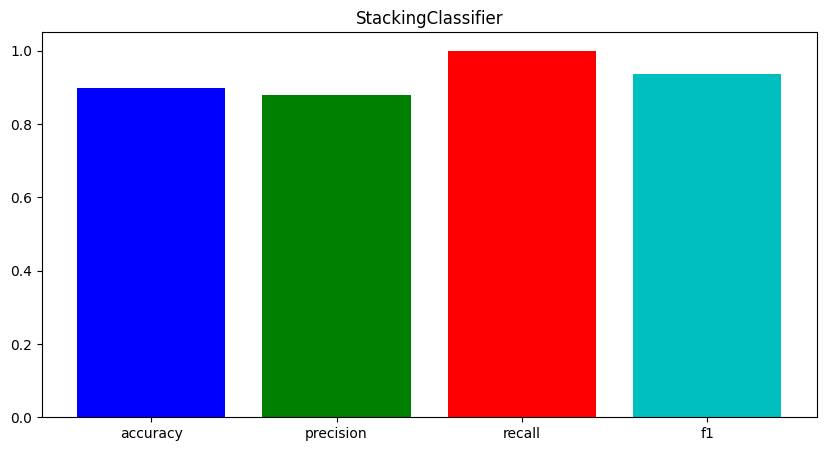

In [88]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
def plot_results(results):
    for classifier_name, metrics in results.items():
        plt.figure(figsize=(10,5))
        plt.bar(metrics.keys(), metrics.values(),color=colors)
        plt.title(classifier_name)
        plt.show()

plot_results(results)

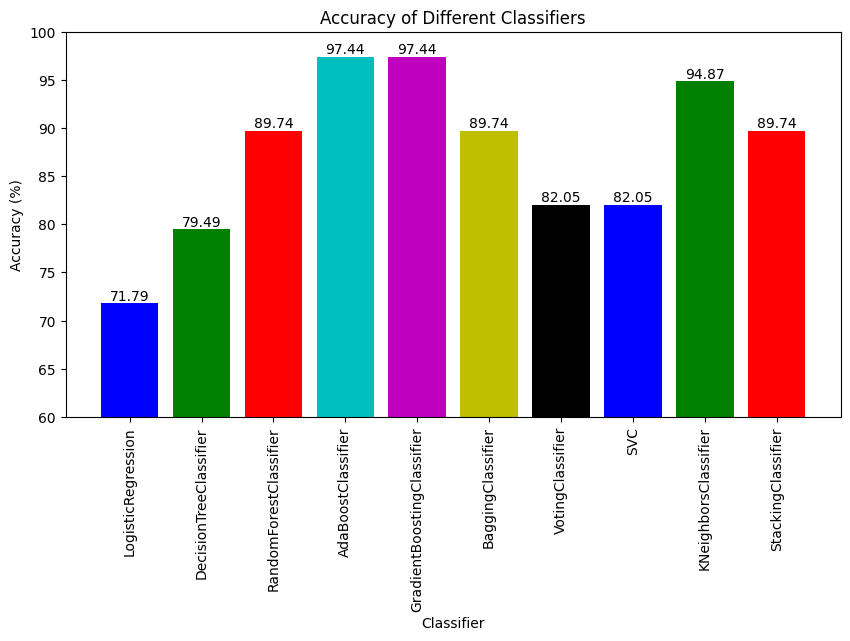

In [89]:
def plot_results(results):
    plt.figure(figsize=(10,5))

    classifier_names = [name for name in results.keys()]
    accuracies = [metrics['accuracy']*100 for metrics in results.values()]

    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

    bars = plt.bar(classifier_names, accuracies, color = colors)
    plt.title('Accuracy of Different Classifiers')
    plt.xlabel('Classifier')
    plt.ylabel('Accuracy (%)')
    plt.ylim([60, 100])
    plt.xticks(rotation=90)

    for bar in bars:
        yval = round(bar.get_height(), 2)
        plt.text(bar.get_x() + bar.get_width()/2, yval, yval,va='bottom',ha='center')

    plt.show()

plot_results(results)